## Hospital Functionality Model

## Scope and Objectives of the Hospital Functionality Model:
The objective of this framework is to model to quantify functionality, recovery, and resilience of a hospital building following seismic events. The presented framework includes the estimation of both quantity and quality components of the offered healthcare service overtime. The framework accounts for damage to the hospital's structural and non-structural components, damage to other lifelines, and interdependence between all lifelines including the hospital. The scope of this model is limited to estimating the functionality of a single hospital. The demand on the hospitals and interaction between the medical facilities will be considered in future implementations.

## UNDERSTANDING THE HOSPITALIZATION SERVICE
The major components that impact the healthcare functionality after major events are shown in Fig. 1. Healthcare system components can be categorized under the following domains: regulators, providers, payers, suppliers, and consumers. Regulators are either governmental or private agencies that control the service; providers are the facilities providing the service; payers are either the insurance company or the patients themselves; suppliers are the resource providers such as pharmaceutical companies; and consumers are the patients that impose a demand on the healthcare system. Noteworthy that these components comprise of many other subcomponents that are interdependent and any shortage of these subcomponents can consequentially affect the hospitalization service functionality.

## Model Description:
To quantify the capacity of healthcare facilities, the total number of staffed beds at the hospital, which are defined as the licensed beds that are immediately available to be occupied by the patient, is used. To operate each bed various socio-technical components are required including personnel, ST, space, SP, and supplies, SU. The availability of these major components is function of basic events, which depend on physical, social and economic factors. The success tree, shown below, uses the availability condition of each basic event to estimate the total number of staffed beds at each healthcare facility. The availability condition of each basic event is assumed to be independent of other events but related to other major factors. For example, ST depends on damage to housings in the community, Fh, and utility availability, FU, and accounts for the direct social losses, LDS, resulting from earthquake damage. The availability of alternative staff, R4, staff transferred from other hospitals, Ms, and the ability of staff to work additional hours, STadd, are also considered when determining the availability of personnel, ST. Horizontal and vertical accessibilities of the healthcare facility are taken into account. Water, power, transportation, telecommunication, wastewater, and drinking water are considered essential services that support hospital operation. The functionality of these services depends on damage and recovery efforts, which are controlled by decision-makers outside the healthcare system and is not within the scope of this study. However, the availability of backup systems for each of these services is considered in the analysis. The operability of these backup systems, Ri, is function of the earthquake damage level, EQd, hospital consumption, C, and refill and maintenance availability, R&M. The availability of the structural, non-structural and content components of the hospital are considered. In addition, the availability of a backup space that can be used in case of damage to the original space or in case of an increase in demand is included in the presented framework. Different supplies, SU, are essential for the healthcare facilities including medical (Oxygen, surgical and Rx), fuel, food, and other supplies, which are all included in the presented model. The availability of these supplies is function of earthquake damage to the supplies storage rooms, EQd, hospital consumption, C, and utility availability, FU, while considering the possibility of supplies transfer from other hospitals, SUadd.
  
  
Quality functionality, in this study, considers the main indicators that are expected to be significantly impacted as a consequence of earthquake disturbance. Accessibility of the medical services, SA, and effectiveness of the offered service, SE, are selected to represent the quality functionality of the healthcare facilities. 

 
Patient waiting time, Wt, which is defined as the time a patient waits before being seen by medical staff, is utilized to estimate accessibility to medical services. To estimate patient waiting time, basic waiting time W0, patient travel time Ttvl, the effect of staffed beds reduction at, and the effect of increase in the total patients' number, ae, are used. Basic waiting time refers to the patient waiting time in the emergency department before receiving the hospitalization service, which is a function of the patient’s case criticality. Patient travel time to the hospital varies after the earthquake because of losses to the ambulances service or damage to the transportation network. The ratio between the current number of staffed beds to the original number before the earthquake, as well as the ratio between the current patient number to the original number, are used to estimate the delay time in the hospitals’ emergency department. To measure the accessibility of the medical services, the ratio between the patient waiting time after, Wta, and before, Wtb, the earthquake is used, while considering the maximum allowable waiting time, Wtmax. 

 
Patient treatment time, Tt, is utilized to estimate the effectiveness of the offered service.  This effectiveness is commonly used to evaluate the achieved patient outcomes accomplished by following the best-practice care guidelines. Immediately after earthquakes and as a consequence of higher demand on healthcare facilities, the medical staff may be tempted to reduce treatment time. Reduction of patient’s treatment time can significantly decrease the patient outcomes, increase fatality rates, and diminish the healthcare system quality. The ratio between the available physician, R1, and hospital demand, Nn, as well as the patient case criticality, PCC, are considered when determining the treatment time. To measure the healthcare effectiveness, the ratio between the patient treatment time after, Tta, and before, Ttb, the earthquake is used, while considering the minimum allowable treatment time, Ttmin. More details regarding healthcare capacity quantification and the success tree analysis can be found in Hassan and Mahmoud (https://urldefense.com/v3/__https://doi.org/10.1016/j.engstruct.2018.05.009__;!!DZ3fjg!tBn1TW8IZBObYoyocsoeOc_k6cJ84Gb3rF572je8Fk_4hfywW-64nujpomWjn2pKyA$  && https://urldefense.com/v3/__https://doi.org/10.1016/j.engstruct.2019.03.008__;!!DZ3fjg!tBn1TW8IZBObYoyocsoeOc_k6cJ84Gb3rF572je8Fk_4hfywW-64nujpomWpxERo2A$  && https://urldefense.com/v3/__https://doi.org/10.1016/j.ress.2020.106953__;!!DZ3fjg!tBn1TW8IZBObYoyocsoeOc_k6cJ84Gb3rF572je8Fk_4hfywW-64nujpomWb47uIyw$ ).

# Model Input Data

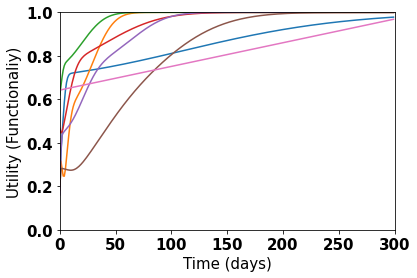

In [6]:
# Define Python Libraries
import pandas as pd;
import numpy as np;
import pylab;
import itertools;
from numpy import array;
import matplotlib.pyplot as plt

# Define data input files
file = 'Input_data.xlsx'                 #Data related to the community servied by the the hospital 
xl = pd.ExcelFile(file, engine='openpyxl');
bt = xl.parse('Sheet1');

file = 'Hospital_data.xlsx'              #Data related to the hospital
x2 = pd.ExcelFile(file, engine='openpyxl');
Ht = x2.parse('Sheet1');
    
Water= bt.iloc[:,1].squeeze();           #Functionality and recovery trajectory of the water system in the investigated community
Power= bt.iloc[:,2].squeeze();           #Functionality and recovery trajectory of the power system in the investigated community 
Trans= bt.iloc[:,3].squeeze();           #Functionality and recovery trajectory of the transportation system in the investigated community
Telecom= bt.iloc[:,4].squeeze();         #Functionality and recovery trajectory of the telecommunication system in the investigated community
Westewater= bt.iloc[:,5].squeeze();      #Functionality and recovery trajectory of the wastewater system in the investigated community
Fuel= bt.iloc[:,6].squeeze();            #Functionality and recovery trajectory of the fuel (natural gas) system in the investigated community
Housing= bt.iloc[:,7].squeeze();         #Functionality and recovery trajectory of the housing units in the investigated community 

E_S= bt.iloc[:,8].squeeze();             #Recovery trajectory of the hospital structural components
E_S_n= bt.iloc[:,9].squeeze();           #Recovery trajectory of the hospital non-structural components 
H_Travel_time= bt.iloc[:,10].squeeze();  #Travel time to the investigated hospital
N_t= bt.iloc[:,11].squeeze();            #Daily number of patients at the investigated hospital

F_s= Ht.iloc[0,0].squeeze();             #Structural losses value at the investigated hospital 
F_ns= Ht.iloc[0,1].squeeze();            #Non-structural losses value at the investigated hospital
F_s_ns= Ht.iloc[0,2].squeeze();          #Total losses value at the investigated hospital
F_c= Ht.iloc[0,3].squeeze();             #Conents losses value at the investigated hospital
F_DS= Ht.iloc[0,4].squeeze();            #Social losses value at the investigated hospital
Housing_DS= Ht.iloc[0,5].squeeze();      #Mean social losses for the whole community
Wt= Ht.iloc[0,6].squeeze();              #Delay time due to the structural repair
Wt_ns= Ht.iloc[0,7].squeeze();           #Delay time due to structural and non-structural repair
T_structural= Ht.iloc[0,8].squeeze();    #Time to finish the structural components repair
T_nonstructural= Ht.iloc[0,9].squeeze(); #Time to finish the non-structural components repair
T_sev= Ht.iloc[0,10].squeeze();          #Time of high severity patients

a_0= Ht.iloc[0,11].squeeze();           #Basic waiting time
a_t= Ht.iloc[0,12].squeeze();           #Impact of staffed bed reduction on the waiting time
a_e= Ht.iloc[0,13].squeeze();           #Impact of patient increase on the waiting time
N_0= Ht.iloc[0,14].squeeze();           #Number of patients at the investigated hospital before the disaster

W_max= Ht.iloc[0,15].squeeze();         #Maximum acceptable waiting time
W_t_min= Ht.iloc[0,16].squeeze();       #Minimal possible waiting time
T_t_min= Ht.iloc[0,17].squeeze();       #Maximum possible treatment time
T_t_0= Ht.iloc[0,18].squeeze();         #Minimal possible treatment time

n_hospitals = 1                         #Total number of hospitals
Recovery_T 	= 300                       #The recovery time frame
B_0			= 70                        #Total number of staffed beds at the investigated hospital
s=1; m=1;

R1= np.zeros((Recovery_T,n_hospitals))  #Physicians availability
R2= np.zeros((Recovery_T,n_hospitals))  #Nurses availability
R3= np.zeros((Recovery_T,n_hospitals))  #Supporting staff availability
R4= np.zeros((Recovery_T,n_hospitals))  #Alternative staffing availability
R5= np.zeros((Recovery_T,n_hospitals))  #Corridor functionality
R6= np.zeros((Recovery_T,n_hospitals))  #Elevator functionality
R7= np.zeros((Recovery_T,n_hospitals))  #Stairs functionality
R8= np.zeros((Recovery_T,n_hospitals))  #Municipal water functionality
R9= np.zeros((Recovery_T,n_hospitals))  #Backup water functionality
R10= np.zeros((Recovery_T,n_hospitals)) #Municipal power system functionality
R11= np.zeros((Recovery_T,n_hospitals)) #Backup power system functionality
R12= np.zeros((Recovery_T,n_hospitals)) #Transportation network functionality
R13= np.zeros((Recovery_T,n_hospitals)) #Transportation detors functionality
R14= np.zeros((Recovery_T,n_hospitals)) #Ambulance service functionality
R15= np.zeros((Recovery_T,n_hospitals)) #Telecommunication service functionality
R16= np.zeros((Recovery_T,n_hospitals)) #Backup Telecommunication service functionality
R17= np.zeros((Recovery_T,n_hospitals)) #Municipal wastewater functionality
R18= np.zeros((Recovery_T,n_hospitals)) #Backup wastewater functionality
R19= np.zeros((Recovery_T,n_hospitals)) #Drinking water system functionality
R20= np.zeros((Recovery_T,n_hospitals)) #Backup drinking water functionality
R21= np.zeros((Recovery_T,n_hospitals)) #Structural component functionality
R22= np.zeros((Recovery_T,n_hospitals)) #Non-structural component functionality
R23= np.zeros((Recovery_T,n_hospitals)) #Contents component functionality
R24= np.zeros((Recovery_T,n_hospitals)) #Backup space functionality
R25= np.zeros((Recovery_T,n_hospitals)) #Oxygen availability
R26= np.zeros((Recovery_T,n_hospitals)) #Surgical supply availability
R27= np.zeros((Recovery_T,n_hospitals)) #Rx availability
R28= np.zeros((Recovery_T,n_hospitals)) #Fuel supply availability
R29= np.zeros((Recovery_T,n_hospitals)) #Food supply availability
R30= np.zeros((Recovery_T,n_hospitals)) #Other supply availability

E_s_average_no_trans= np.zeros((Recovery_T,n_hospitals)) #Average functionality of the utility without tranporation for the investigated hospital
Utility_trans= np.zeros((Recovery_T,n_hospitals))        #Average functionality of the utility with tranporation for the investigated hospital
Utility_trans_Housing= np.zeros((Recovery_T,n_hospitals))#Average functionality of the utility with tranporation and housing for the investigated hospital

# Plot the change in utility functionality over the recovery time
T_p = list(range(0,300)); #Plot X axis range
plt.plot(T_p,Water,T_p,Power,T_p,Trans,T_p,Telecom,T_p,Westewater,T_p,Fuel,T_p,Housing); 
plt.xlabel("Time (days)")
plt.ylabel("Utility (Functionaliy)")
font = {'family' : 'DejaVu Sans','weight' : 'bold','size'   : 15}
plt.rc('font', **font)
plt.xlim([0, 300])
plt.ylim([0, 1])
plt.show()

# Main Events Calculations

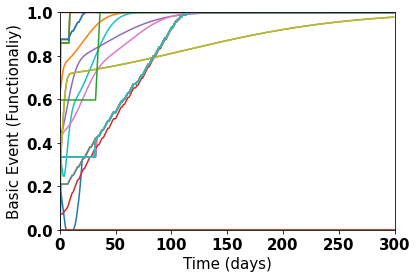

In [2]:
for s in range(Recovery_T):
   # Transportation network and detour
   R12[s] = Trans[s]; #Transportation system functionality
   R13[s] = 0.0;      #Transportation detors functionality
   
   #average functionality of the utility
   E_s_average_no_trans[s] = np.mean([Water[s],Power[s],Telecom[s],Westewater[s],Fuel[s],E_S_n[s]]); #average functionality of the utility without tranporation 
   Utility_trans[s] = (max(R12[s],R13[s])+E_s_average_no_trans[s])/2;                                #average utility and transportation
   Utility_trans_Housing[s] = (Utility_trans[s]+Housing[s])/2;                                       #minimun of utility, transportation and housing

s=1; m=1;
for s in range(Recovery_T):    
    #Personnel Availability
    if s<=Wt:        
        R1[s] = F_DS;
    elif (Utility_trans_Housing[s]) > 0.5:
        R1[s] = 1.0;
    else:
        R1[s] = Utility_trans_Housing[s]+1-Utility_trans_Housing[s]; #Physicain avalilability 

    R2[s] =  R1[s];                                                  #Nurses avalilability 
    R3[s] =  R1[s];                                                  #Supportive staff avalilability    
  
    if s<=Wt:                                                        #Alternative staffing avalilability
        R4[s] = (1-Housing_DS);
    elif (Utility_trans_Housing[s]) > 0.5:
        R4[s] = 1.0;
    else:
        R4[s] = Utility_trans_Housing[s]+1-Utility_trans_Housing[s];
        
    #Accessability
    if s<=(Wt+T_structural):   #Corridor functionality 
        R5[s] = F_ns;
    else: 
        R5[s] = E_S_n[s];
  
    R6[s] =  R5[s] ;         #Elevator functionality
    R7[s] =  R5[s] ;         #Stairs functionality
    
    #Supportive Infrastructure
    #Municipal systems

    R8[s] =  Water[s];  #Municipal water functionality
    R10[s]= Power[s];   #Municipal power functionality
    
    #Ambulance service functionality
    R14[s] = min(E_S_n[s]-0.25*(1-Telecom[s])-N_t[s]*0.0,E_S_n[s]);
    R14[s] = max(R14[s],0);

    R15[s] = Telecom[s];    #Telecom service functionality
    R17[s] = Westewater[s]; #Municipal wastwater functionality
    R19[s] = Water[s];      #Drinking water functionality
    
    
    #Backup systems
    #Backup water system functionality
    if s==1.0:
        R9[s] = min(F_s_ns+(R8[s]-0.33),E_S_n[s]);
    else:
        R9[s] = min(R9[s-1]+(R8[s]-0.33),E_S_n[s]);

    R9[s] = max(R9[s],0);
    
    #Fuel availability
    if s==1.0:
        R28[s] = min(F_s_ns+(Utility_trans[s]-N_t[s]*0.0005),E_S_n[s]);
    else:
        R28[s] = min(R28[s-1]+(Utility_trans[s]-N_t[s]*0.0005),E_S_n[s]);

    R28[s] = max(R28[s],0);
    
    #Backup power system functionality
    if s==1.0:
        R11[s] = min(F_s_ns+(R28[s]-0.25),E_S_n[s]);
    else:
        R11[s] = min(R11[s-1]+(R28[s]-0.25),E_S_n[s]);

    R11[s] = max(R11[s],0); 

    #Backup Telecom service functionality
    if s==1.0:
        R16[s] = min(F_ns+(R10[s]+R11[s]-0.1),F_ns);
    elif s<=((Wt+T_structural)-1):
        R16[s] = min(R16[s-1]+(R10[s]+R11[s]-0.1),F_ns);
    else:
        R16[s] = min(R16[s-1]+(R10[s]+R11[s]-0.1),E_S_n[s]);

    R16[s] = max(R16[s],0);

    #Backup wastwater system functionality
    if s==1.0:
        R18[s] = min((F_s+R12[s]+R13[s]-0.1),(E_S_n[s]+(1-F_ns)));
    elif s<=((Wt+T_structural)-1):
        R18[s] = min(R18[s-1]+(R12[s]+R13[s]-0.1),E_S_n[s]+(1-F_ns));
    else:
        R18[s] = 1.0;

    R18[s] = max(R18[s],0);

    #Backup drinking water functionality
    if s==1.0:
        R20[s] = min((F_s_ns+R8[s]-0.33),E_S_n[s]);
    else:
        R20[s] = min(R20[s-1]+(R8[s]-0.33),E_S_n[s]);

    R20[s] = max(R20[s],0);
    
    #Working Space
    #Structural component functionality    
    if s<=Wt:
        R21[s] = F_s;
    elif s<=(Wt+T_structural-1):
        R21[s] = E_S_n[s]+(1-F_ns);
    else:
        R21[s] = 1.0;

    #Non-structural component functionality  
    if s<=(Wt+T_structural-1):
        R22[s] = F_ns;
    else:
        R22[s] = E_S_n[s];

    #content functionality         
    if s<=(Wt+T_structural):
        R23[s] = F_c;
    else:
        R23[s] = min(F_c+(1-F_c)*0.25*(s-Wt-T_structural),1.0);

    #Backup space functionality
    R24[s] = 0.0;
    
    #Supplies
    #Oxygen availability
    if s==1.0:
        R25[s] = F_ns;
    elif s<=((Wt+T_structural)-1):
       R25[s] = min(R25[s-1]+(Utility_trans[s]-N_t[s]*0.0002),F_ns);
    else:
       R25[s] = min(R25[s-1]+(Utility_trans[s]-N_t[s]*0.0002),E_S_n[s]);

    R25[s] = max(R25[s],0);

    R26[s] = R25[s];                                     #Surgical supply availability
    R27[s] = R25[s];                                     #Rx availability
    R29[s] = R25[s];                                     #Food supply availability
    R30[s] = R25[s];                                     #Other supply availability    
    
# Plot the change on the basic events over the recovery time
T_p = list(range(0,300)); #Plot X axis range
plt.plot(T_p,R1,T_p,R2,T_p,R3,T_p,R4,T_p,R5,T_p,R6,T_p,R7,T_p,R8,T_p,R9,T_p,R10, \
         T_p,R11,T_p,R12,T_p,R13,T_p,R14,T_p,R15,T_p,R16,T_p,R17,T_p,R18,T_p,R19,T_p,R20, \
         T_p,R21,T_p,R22,T_p,R23,T_p,R24,T_p,R25,T_p,R26,T_p,R27,T_p,R28,T_p,R29,T_p,R30); 
plt.xlabel("Time (days)")
plt.ylabel("Basic Event (Functionaliy)")
font = {'family' : 'DejaVu Sans','weight' : 'bold','size'   : 15}
plt.rc('font', **font)
plt.xlim([0, 300])
plt.ylim([0, 1])
plt.show()

## Success tree analysis

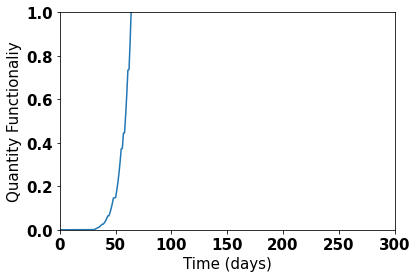

In [3]:
r1_3= np.zeros((Recovery_T,n_hospitals))       #functionality of physicians, nurses and supporting staff
r1_4= np.zeros((Recovery_T,n_hospitals))       #functionality of the staff
r6_7= np.zeros((Recovery_T,n_hospitals))       #vertical accessibility
r5_7= np.zeros((Recovery_T,n_hospitals))       #total accessibility
r8_9= np.zeros((Recovery_T,n_hospitals))       #water functionality
r10_11= np.zeros((Recovery_T,n_hospitals))     #power functionality
r12_13= np.zeros((Recovery_T,n_hospitals))     #trans functionality
r12_14= np.zeros((Recovery_T,n_hospitals))     #total trans functionality
r15_16= np.zeros((Recovery_T,n_hospitals))     #telecom. functionality
r17_18= np.zeros((Recovery_T,n_hospitals))     #wastewater functionality
r19_20= np.zeros((Recovery_T,n_hospitals))     #drinking water functionality
r8_20= np.zeros((Recovery_T,n_hospitals))      #total utility functionality
r21_23= np.zeros((Recovery_T,n_hospitals))     #hospital building functionality
r21_24= np.zeros((Recovery_T,n_hospitals))     #total hospital building functionality
r5_24= np.zeros((Recovery_T,n_hospitals))      #functionality of space
r25_30= np.zeros((Recovery_T,n_hospitals))     #functionality of supplies
Func= np.zeros((Recovery_T,n_hospitals))       #total hospital quantity functionality
Beds= np.zeros((Recovery_T,n_hospitals))       #number of staffed beds at any time t
for s in range(Recovery_T):
	r1_3[s] = (R1[s]*R2[s]*R3[s]);
	r1_4[s] = 1- ((1-r1_3[s])*(1-R4[s]));
	r6_7[s] = 1- ((1-R6[s])*(1-R7[s])); 
	r5_7[s] = (R5[s]*r6_7[s]);
	r8_9[s] = 1- ((1-R8[s])*(1-R9[s]));
	r10_11[s] = 1- ((1-R10[s])*(1-R11[s]));
	r12_13[s] = 1- ((1-R12[s])*(1-R13[s]));
	r12_14[s] = (r12_13[s]*R14[s]);
	r15_16[s] = 1- ((1-R15[s])*(1-R16[s]));
	r17_18[s] = 1- ((1-R17[s])*(1-R18[s]));
	r19_20[s] = 1- ((1-R19[s])*(1-R20[s]));
	r8_20[s] = (r8_9[s]*r10_11[s]*r12_14[s]*r15_16[s]*r17_18[s]*r19_20[s]);
	r21_23[s] = R21[s]*R22[s]*R23[s];
	r21_24[s] = 1- ((1-r21_23[s])*(1-R24[s]));
	r5_24[s] = (r5_7[s]*r8_20[s]*r21_24[s]);
	r25_30[s] = (R25[s]*R26[s]*R27[s]*R28[s]*R29[s]*R30[s]);
	Func[s] = (r1_4[s]*r5_24[s]*r25_30[s]);
	Beds[s] = (Func[s]*B_0);
    
    
#Plot the total functionality of the investigated hospital
plt.plot(Beds)
plt.xlabel("Time (days)")
plt.ylabel("Quantity Functionaliy")
font = {'family' : 'DejaVu Sans','weight' : 'bold','size'   : 15}
plt.rc('font', **font)
plt.xlim([0, 300])
plt.ylim([0, 1])
plt.show()

## Hospital Quality

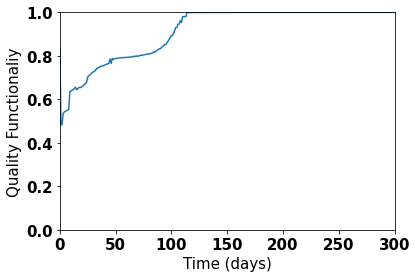

In [4]:
W_t= np.zeros((Recovery_T,n_hospitals));   #Waiting time
T_t= np.zeros((Recovery_T,n_hospitals));   #Treatment time
S_A= np.zeros((Recovery_T,n_hospitals));   #Accessibility of the medical services at any time t
S_E= np.zeros((Recovery_T,n_hospitals));   #Effectiveness of the medical services at any time t
Q_s= np.zeros((Recovery_T,n_hospitals))
F= np.zeros((Recovery_T,n_hospitals)) 

for s in range(Recovery_T):
    W_t[s] = max(a_0 + H_Travel_time[s] + a_t*(B_0-Beds[s])/B_0 + a_e*(N_t[s]-N_0)/N_0 , a_0)          # waiting time
    T_t[s] = R1[s]/N_t[s]                                                                              # treatment time
    S_A[s] = min(max((W_max - W_t[s])/(W_max - W_t_min),0.0),1.0)                                      # medical services accessabilility
    S_E[s] = min(max((T_t[s] - T_t_min)/(T_t_0 - T_t_min),0.0),1.0)                                    # medical services effectiviness
    Q_s[s] = S_A[s]*S_E[s]                                                                             # qualitative functionality 
    
    
#Plot the total functionality of the investigated hospital
plt.plot(Q_s)
plt.xlabel("Time (days)")
plt.ylabel("Quality Functionaliy")
font = {'family' : 'DejaVu Sans','weight' : 'bold','size'   : 15}
plt.rc('font', **font)
plt.xlim([0, 300])
plt.ylim([0, 1])
plt.show()

## Total Functionality

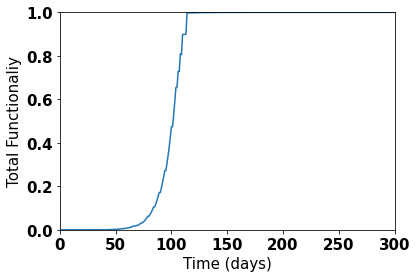

In [5]:
T_recover=int(np.linalg.norm(Recovery_T)-3*T_sev); #Total recovery stage time
#Change in the weighting factor of the hospital quality
I_quality=np.column_stack([np.array(0.25*np.ones((1,T_sev))) , np.array(0.5*np.ones((1,T_sev))) , 0.5*np.ones((1,T_sev)) , 0.5*np.ones((1,T_recover))]);
for s in range(Recovery_T):
    F[s]   = Q_s[s]**(I_quality[0,s])*Func[s]; #Total functionality of the investigated hospital
    # print(F)

#Plot the total functionality of the investigated hospital
plt.plot(F)
plt.xlabel("Time (days)")
plt.ylabel("Total Functionaliy")
font = {'family' : 'DejaVu Sans','weight' : 'bold','size'   : 15}
plt.rc('font', **font)
plt.xlim([0, 300])
plt.ylim([0, 1])
plt.show()